In [10]:
from ncempy import io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, writers

In [2]:
loaded_data = io.dm.dmReader("EFTEM-SI_01 [0,35] eV_cor.dm4")


In [18]:
print(loaded_data)

{'filename': 'EFTEM-SI_01 [0,35] eV_cor.dm4', 'data': array([[[ 5.00235742e+03,  3.32955615e+03,  3.35153296e+03, ...,
          3.38780908e+03,  3.39814331e+03,  3.38402197e+03],
        [ 4.97556543e+03,  8.48826504e+00,  1.54452171e+01, ...,
          9.75760117e+01,  7.77090149e+01,  3.10536957e+01],
        [ 4.99599951e+03,  6.32349777e+00, -4.30558300e+00, ...,
          6.48236008e+01,  7.79403610e+01,  4.48494911e+01],
        ...,
        [ 4.99353613e+03, -2.01008263e+01,  4.54737473e+00, ...,
          4.23575439e+01,  4.04487648e+01,  8.81503906e+01],
        [ 5.01711816e+03,  2.88417015e+01,  1.95031796e+01, ...,
          1.05420670e+02,  8.44316101e+01,  1.41534805e+01],
        [ 5.00132227e+03, -8.38953972e+00, -2.21271515e+00, ...,
          9.02483292e+01,  4.09517670e+01,  6.16828918e+01]],

       [[ 6.76471924e+03,  6.76169971e+03,  6.76258789e+03, ...,
          6.77298145e+03,  6.77195312e+03,  6.78212646e+03],
        [ 6.75997412e+03,  1.41125679e+01,  4.572

In [5]:
data_cube = loaded_data["data"]

In [8]:
#Saving the file in numpy for later use
#np.save("data/data_cube", data_cube)

In [9]:
#test_array = np.load("data/data_cube.npy")
#This seems to be quicker

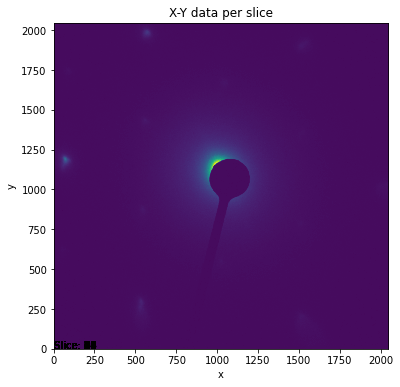

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches((6,6))

x = np.arange(2048)

def init():
    ax.set_title("X-Y data per slice")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.pcolorfast(x, x, data_cube[0,:,:])

def animate(i):
    ax.pcolorfast(x, x, data_cube[i,:,:])
    ax.text(0,0, "Slice: "+str(i))

anim = FuncAnimation(fig, animate, init_func=init, frames=70, interval=20)
anim.save("slices.gif")


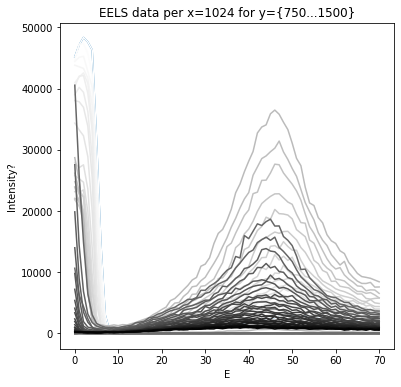

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches((6,6))

x = np.arange(2048)

def init():
    ax.set_title("EELS data per x=1024 for y={750...1500}")
    ax.set_xlabel("E")
    ax.set_ylabel("Intensity?")
    ax.plot( np.arange( data_cube.shape[0] ), data_cube[:,1024,750] )

def animate(i):
    ax.plot( np.arange( data_cube.shape[0] ), data_cube[:,1024,750+10*i], color=str(1-i/75) )

anim = FuncAnimation(fig, animate, init_func=init, frames=75, interval=20)
anim.save("EELS.gif")

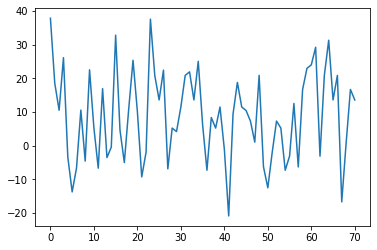

In [21]:
plt.plot(np.arange(71),data_cube[:,1024,1024])